## Multi-Layer Perceptron (MLP)

A Multi-Layer Perceptron (MLP) is a feedforward neural network that extends the  
single-layer perceptron by stacking multiple nonlinear transformation layers.  
By introducing hidden layers and nonlinear activation functions, MLPs are able  
to model complex, nonlinear relationships between input features and target  
labels.

An MLP typically consists of three types of layers:

- **Input layer**: receives the feature vector x∈Rd\mathbf{x} \in \mathbb{R}^dx∈Rd.
    
- **Hidden layers**: perform nonlinear feature transformations.
    
- **Output layer**: produces the final prediction for classification or regression.
    

---

### Forward Propagation

Let $\large \mathbf{x}$ denote an input sample. For a network with $\large L$ layers,  
the forward propagation is defined as:

$$\large \mathbf{z}^{(l)} = \mathbf{W}^{(l)} \mathbf{a}^{(l-1)} + \mathbf{b}^{(l)}, \quad l = 1, \dots, L$$
$$\large \mathbf{a}^{(l)} = \phi\left(\mathbf{z}^{(l)}\right)$$

where:

- $\large \mathbf{W}^{(l)}$ and $\large \mathbf{b}^{(l)}$ are the weight matrix and bias  
    vector of layer $\large l$,
    
- $\large \phi(\cdot)$ is a nonlinear activation function such as ReLU, sigmoid, or tanh,
    
- $\large \mathbf{a}^{(0)} = \mathbf{x}$.
    

For classification tasks, the output layer commonly uses:

- **Sigmoid activation** for binary classification,
    
- **Softmax activation** for multi-class classification.
    

---

### Loss Function

The MLP is trained by minimizing a task-specific loss function:

- **Binary Cross-Entropy** for binary classification:
    
$$\mathcal{L} = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \right]
$$
- **Mean Squared Error (MSE)** for regression:
    
$$\large \mathcal{L} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

---

### Backpropagation and Training

Model parameters are optimized using **backpropagation**, which applies the chain  
rule to compute gradients of the loss function with respect to each model  
parameter:

$$\large \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(l)}}, \quad \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(l)}}$$

The parameters are updated using gradient descent or one of its variants:

$$\large \mathbf{W}^{(l)} \leftarrow \mathbf{W}^{(l)} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(l)}}$$$$\large \mathbf{b}^{(l)} \leftarrow \mathbf{b}^{(l)} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(l)}}$$

where $\large \eta$ is the learning rate.


## Data Preprocessing

Real-world datasets often require preprocessing before being used to train  
neural networks. In particular, **Multi-Layer Perceptrons are sensitive to both  
feature scales and categorical representations**, making preprocessing a  
critical step.

The Bank Marketing dataset contains a mix of numerical and categorical features,  
as well as a binary target variable. The following steps are applied:

1. Encode the target variable
    
2. Convert categorical features using one-hot encoding
    
3. Standardize numerical features
    

### Target Encoding

The target variable `y` indicates whether a client subscribed to a term deposit.  
It is encoded as a binary label:

- `yes` → 1
    
- `no` → 0

In [1]:
import pandas as pd

# Load the reduced dataset
df = pd.read_csv("D:/研究生/机器学习/INDE-577/ml_project/examples/data/bank-additional-small.csv")

# Encode target variable
df["y"] = df["y"].map({"no": 0, "yes": 1})

df[["y"]].head()


,y
0,1
1,0
2,0
3,0
4,0


Separate the input features from the target label.
At this stage, the feature matrix contains both numerical and categorical
variables, which must be handled differently.

In [2]:
X_df = df.drop(columns=["y"])
y = df["y"].values


### Categorical Feature Encoding

Categorical features are converted into numerical form using one-hot
encoding. This transformation allows the MLP to process categorical
information without introducing artificial ordinal relationships.

In [3]:
X_encoded = pd.get_dummies(
    X_df,
    drop_first=True
)

X_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,40,160,1,999,0,-0.1,93.200,-42.0,4.245,5195.8,...,False,True,False,False,False,True,False,False,True,False
1,24,342,4,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,True,False,False,False,True,False,False,False,True,False
2,60,146,3,999,0,1.4,93.444,-36.1,4.970,5228.1,...,False,False,False,False,True,False,False,False,True,False
3,28,373,2,999,0,-2.9,92.963,-40.8,1.266,5076.2,...,False,False,False,False,True,False,False,False,True,False
4,32,326,3,999,0,1.4,93.444,-36.1,4.965,5228.1,...,False,False,False,False,True,False,False,False,True,False


### Feature Scaling

Neural networks are highly sensitive to feature scales. Without scaling, features
with larger numeric ranges may dominate gradient updates, leading to unstable or
slow training.

Apply standardization to ensure each feature has zero mean and unit
variance.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

After scaling, all features contribute more evenly during optimization, which
significantly improves convergence behavior for MLP models.

In [5]:
print("Feature matrix shape:", X_scaled.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (5000, 52)
Target vector shape: (5000,)


## MLP Model Training

### Train–Test Split

Firstly split the dataset into training and testing subsets to evaluate
generalization performance.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 4000
Testing samples: 1000


### Model Configuration

Configure the MLP with two hidden layers. This architecture provides enough
capacity to model nonlinear patterns while remaining computationally efficient
for demonstration purposes.

In [7]:
from rice_ml.multilayer_perceptron import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation="relu",
    learning_rate=0.01,
    max_iter=500,
    batch_size=64,
    l2=1e-4,
    random_state=42,
    verbose=False
)


**Hyperparameter choices:**

- `hidden_layer_sizes=(32, 16)`: two hidden layers with decreasing widths
    
- `activation="relu"`: efficient and widely used nonlinear activation
    
- `learning_rate=0.01`: balances convergence speed and stability
    
- `batch_size=64`: mini-batch gradient descent
    
- `l2=1e-4`: mild regularization to reduce overfitting

### Model Training

In [8]:
mlp.fit(X_train, y_train)

### Training Loss Curve

To examine the convergence behavior of the MLP, we visualize the training loss
over iterations.

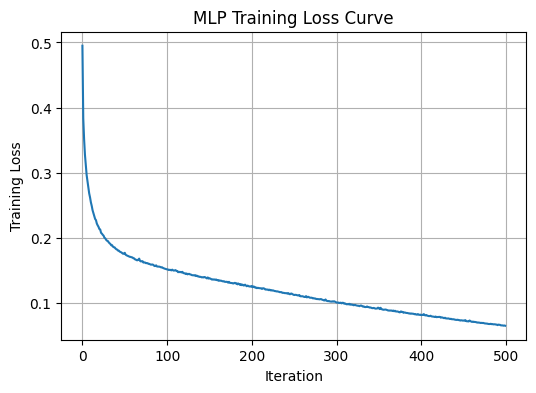

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("MLP Training Loss Curve")
plt.grid(True)
plt.show()


### Model Evaluation

Evaluate the trained model on the test set using classification accuracy.

In [10]:
test_accuracy = mlp.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9020


## Evaluation Metrics

While classification accuracy provides a general measure of model performance,  
it can be misleading for imbalanced datasets such as the Bank Marketing dataset.  
Therefore, we further evaluate the MLP classifier using additional metrics that  
capture class-wise performance.

---

### Confusion Matrix

The confusion matrix summarizes prediction outcomes by comparing predicted  
labels with true labels.

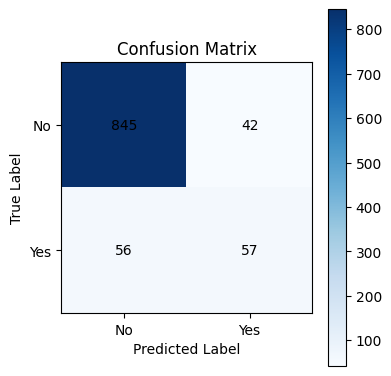

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_pred = mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


The confusion matrix allows us to distinguish between:

- True Negatives (TN): correctly predicted non-subscriptions
    
- False Positives (FP): incorrect positive predictions
    
- False Negatives (FN): missed subscriptions
    
- True Positives (TP): correctly predicted subscriptions

### Precision, Recall, and F1-Score

To better assess performance on the positive class (`y = yes`), we compute  
precision, recall, and F1-score.

In [12]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    target_names=["No", "Yes"]
))


              precision    recall  f1-score   support

          No       0.94      0.95      0.95       887
         Yes       0.58      0.50      0.54       113

    accuracy                           0.90      1000
   macro avg       0.76      0.73      0.74      1000
weighted avg       0.90      0.90      0.90      1000



These metrics are defined as:

- **Precision**: proportion of predicted positive cases that are truly positive
    
- **Recall**: proportion of actual positive cases that are correctly identified
    
- **F1-score**: harmonic mean of precision and recall

## Evaluation Summary and Discussion

The Multi-Layer Perceptron (MLP) classifier achieves a **test accuracy of 90.2%**  
on the Bank Marketing dataset, indicating strong overall predictive performance.  
The training loss curve shows a smooth and monotonic decrease, suggesting stable  
convergence without signs of divergence or severe overfitting.

However, a closer inspection using class-wise evaluation metrics reveals a more  
nuanced performance profile.

---

### Class-wise Performance Analysis

From the classification report and confusion matrix:

- The **negative class (“No”)** is predicted with high precision and recall  
    (precision ≈ 0.94, recall ≈ 0.95), indicating that the model is highly reliable  
    in identifying customers who are unlikely to subscribe.
    
- The **positive class (“Yes”)** exhibits lower recall (≈ 0.50), meaning that  
    approximately half of actual subscribers are missed by the model. This behavior  
    is reflected in the confusion matrix, where false negatives remain non-negligible.
    

This imbalance in performance is largely due to the **class imbalance inherent in  
the dataset**, where positive subscription cases are relatively rare.

---

### Interpretation of Results

- The high overall accuracy is primarily driven by excellent performance on the  
    majority class.
    
- The reduced recall for the minority class highlights a common challenge in  
    real-world classification tasks: optimizing for accuracy alone may not align  
    with business objectives.
    
- In marketing applications, increasing recall for potential subscribers may be  
    more valuable than minimizing false positives, suggesting that alternative  
    decision thresholds or cost-sensitive learning strategies could further improve  
    practical utility.
    

---

### Key Takeaways

- The MLP successfully captures nonlinear relationships in a real-world dataset,  
    outperforming simpler linear models in expressive capacity.
    
- Proper preprocessing and feature scaling are critical for stable MLP training.
    
- Evaluation beyond accuracy is essential, especially for imbalanced datasets.
    

Overall, this example demonstrates both the strengths and limitations of MLPs in  
applied classification problems and highlights the importance of metric selection  
in model evaluation.